In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

In [42]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 636 kB 27.3 MB/s 
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
df = pd.read_csv("data/test.csv")
df.head()

,article,label
0,The president has yet to clarify what victory ...,right
1,"SHARETo hear President Joe Biden tell it, the ...",right
2,SHAREThe mainstream media's honeymoon with Pre...,right
3,"The ""Squad"" makes a demand for which there is ...",right
4,The restraint crowd delivers America's humilia...,right


In [4]:
df.article = df.article.apply(lambda x: x.replace("SHARE",""))
df.article = df.article.apply(lambda x: x.lower())
df.head()

,article,label
0,the president has yet to clarify what victory ...,right
1,"to hear president joe biden tell it, the ameri...",right
2,the mainstream media's honeymoon with presiden...,right
3,"the ""squad"" makes a demand for which there is ...",right
4,the restraint crowd delivers america's humilia...,right


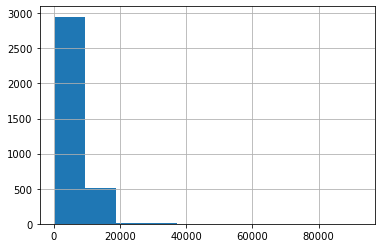

In [5]:
# umber of characters present in each sentence
df.article.str.len().hist()

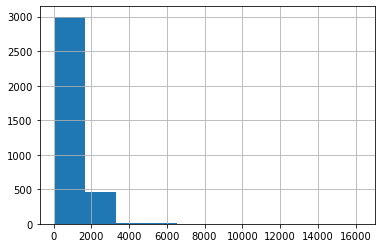

In [6]:
# number of words appearing in each article
df.article.str.split().map(lambda x: len(x)).hist()

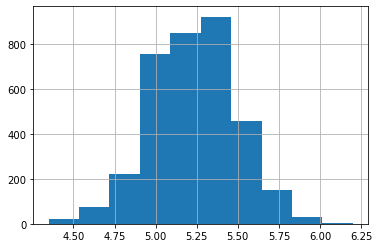

In [7]:
#the average word length in each sentence.
df.article.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [8]:
stop = set(stopwords.words('english'))

In [9]:
corpus = [] 
article = df.article.str.split()
article = article.values.tolist()
corpus = [word for i in article for word in i]

In [10]:
dictionary = defaultdict(int)

In [11]:
for word in corpus:
    if word in stop:
        dictionary[word] +=1

<BarContainer object of 10 artists>

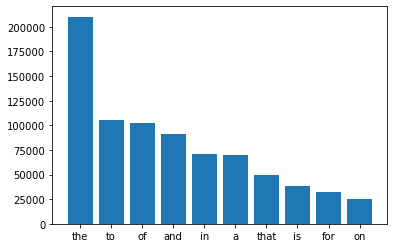

In [12]:
top=sorted(dictionary.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [13]:
"""
we know which stopwords occur frequently in our text,
let’s inspect which words other than these stopwords
occur frequently.
"""

'\nwe know which stopwords occur frequently in our text,\nlet’s inspect which words other than these stopwords\noccur frequently.\n'

In [16]:
counter = Counter(corpus)
most = counter.most_common()

In [17]:
x,y = [],[]

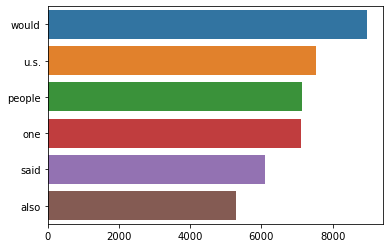

In [19]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [26]:
len(corpus)


3499973

In [29]:
text = " ".join(corpus)

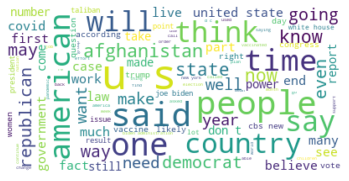

In [30]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
wordcloud.to_file("img/cloud.png")

In [34]:
x_label = df.label.value_counts()
y_label = x_label.sort_index()

/home/kostrovy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


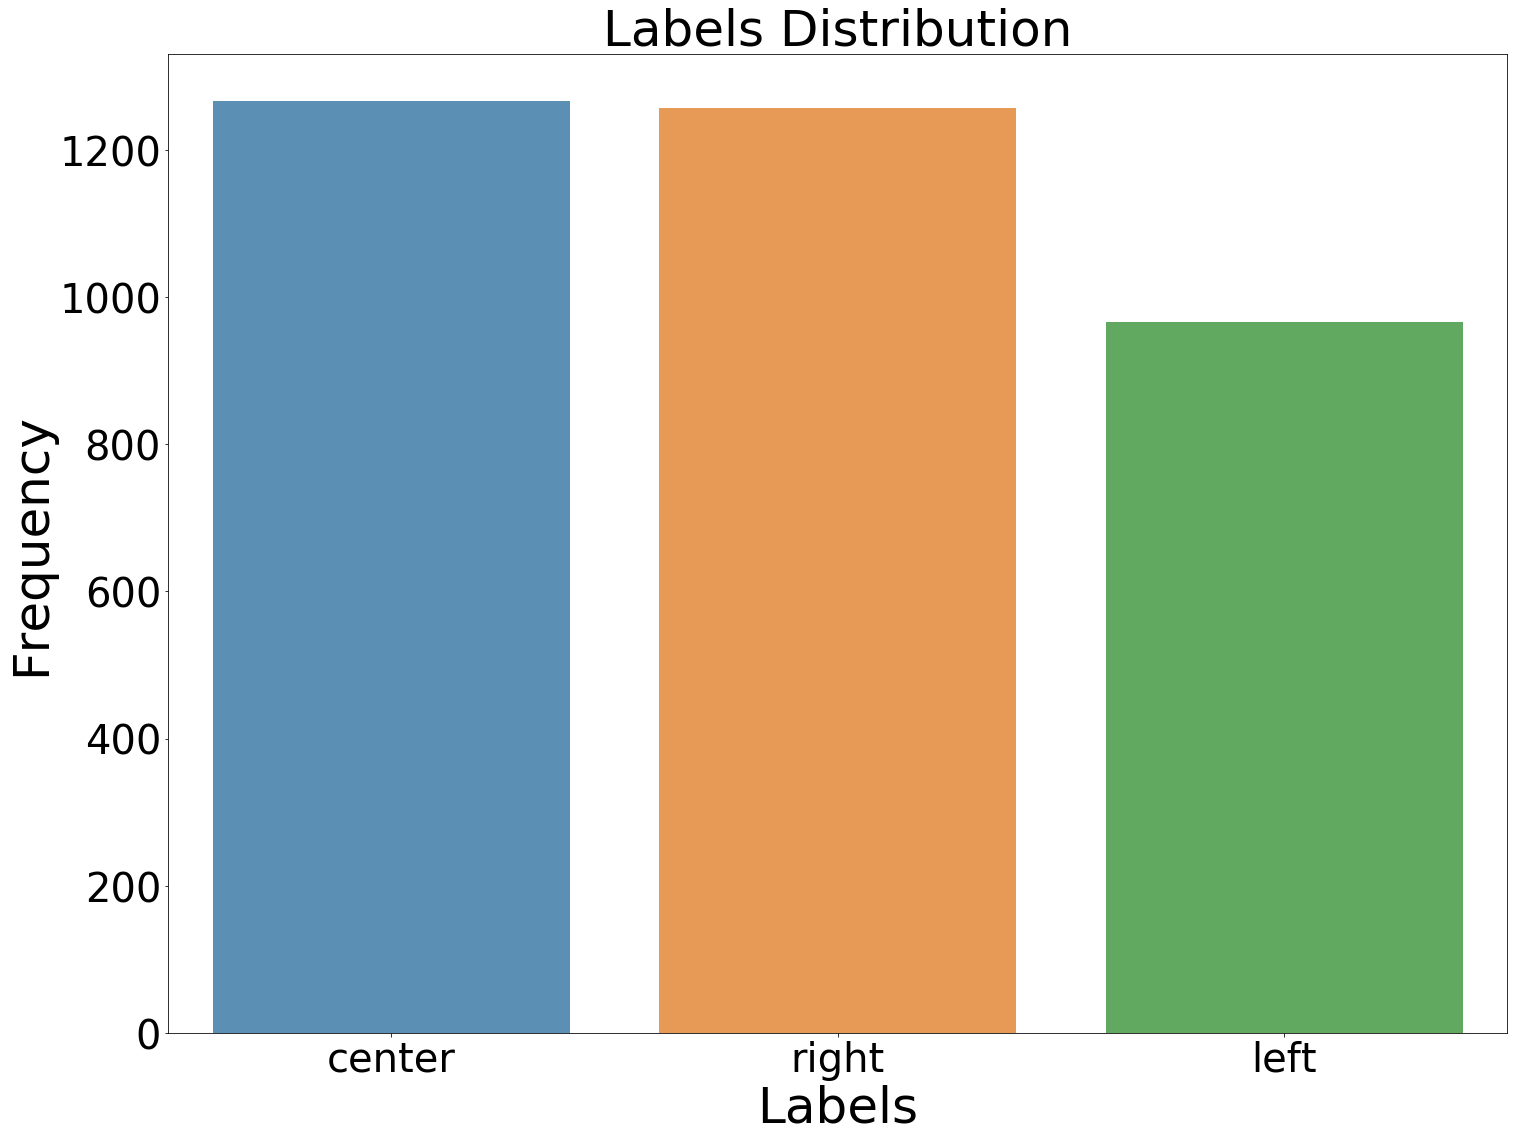

In [37]:
plt.figure(figsize=(24,18))
sns.barplot(x_label.index, x_label.values, alpha=0.8)
plt.title("Labels Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Labels', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

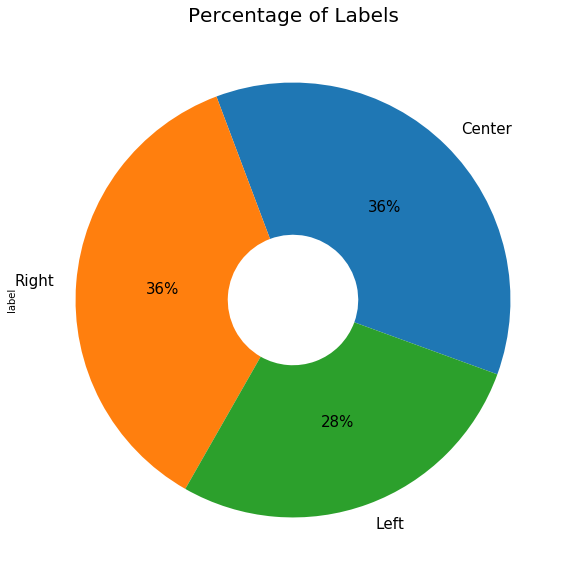

In [38]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.label.value_counts().plot(kind='pie', labels=['Center', 'Right', 'Left'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

In [40]:
df['word_count'] = df.article.apply(lambda x: len(str(x).split()))

In [44]:
df['sentiment'] = df.article.apply(lambda x: TextBlob(x).sentiment.polarity)

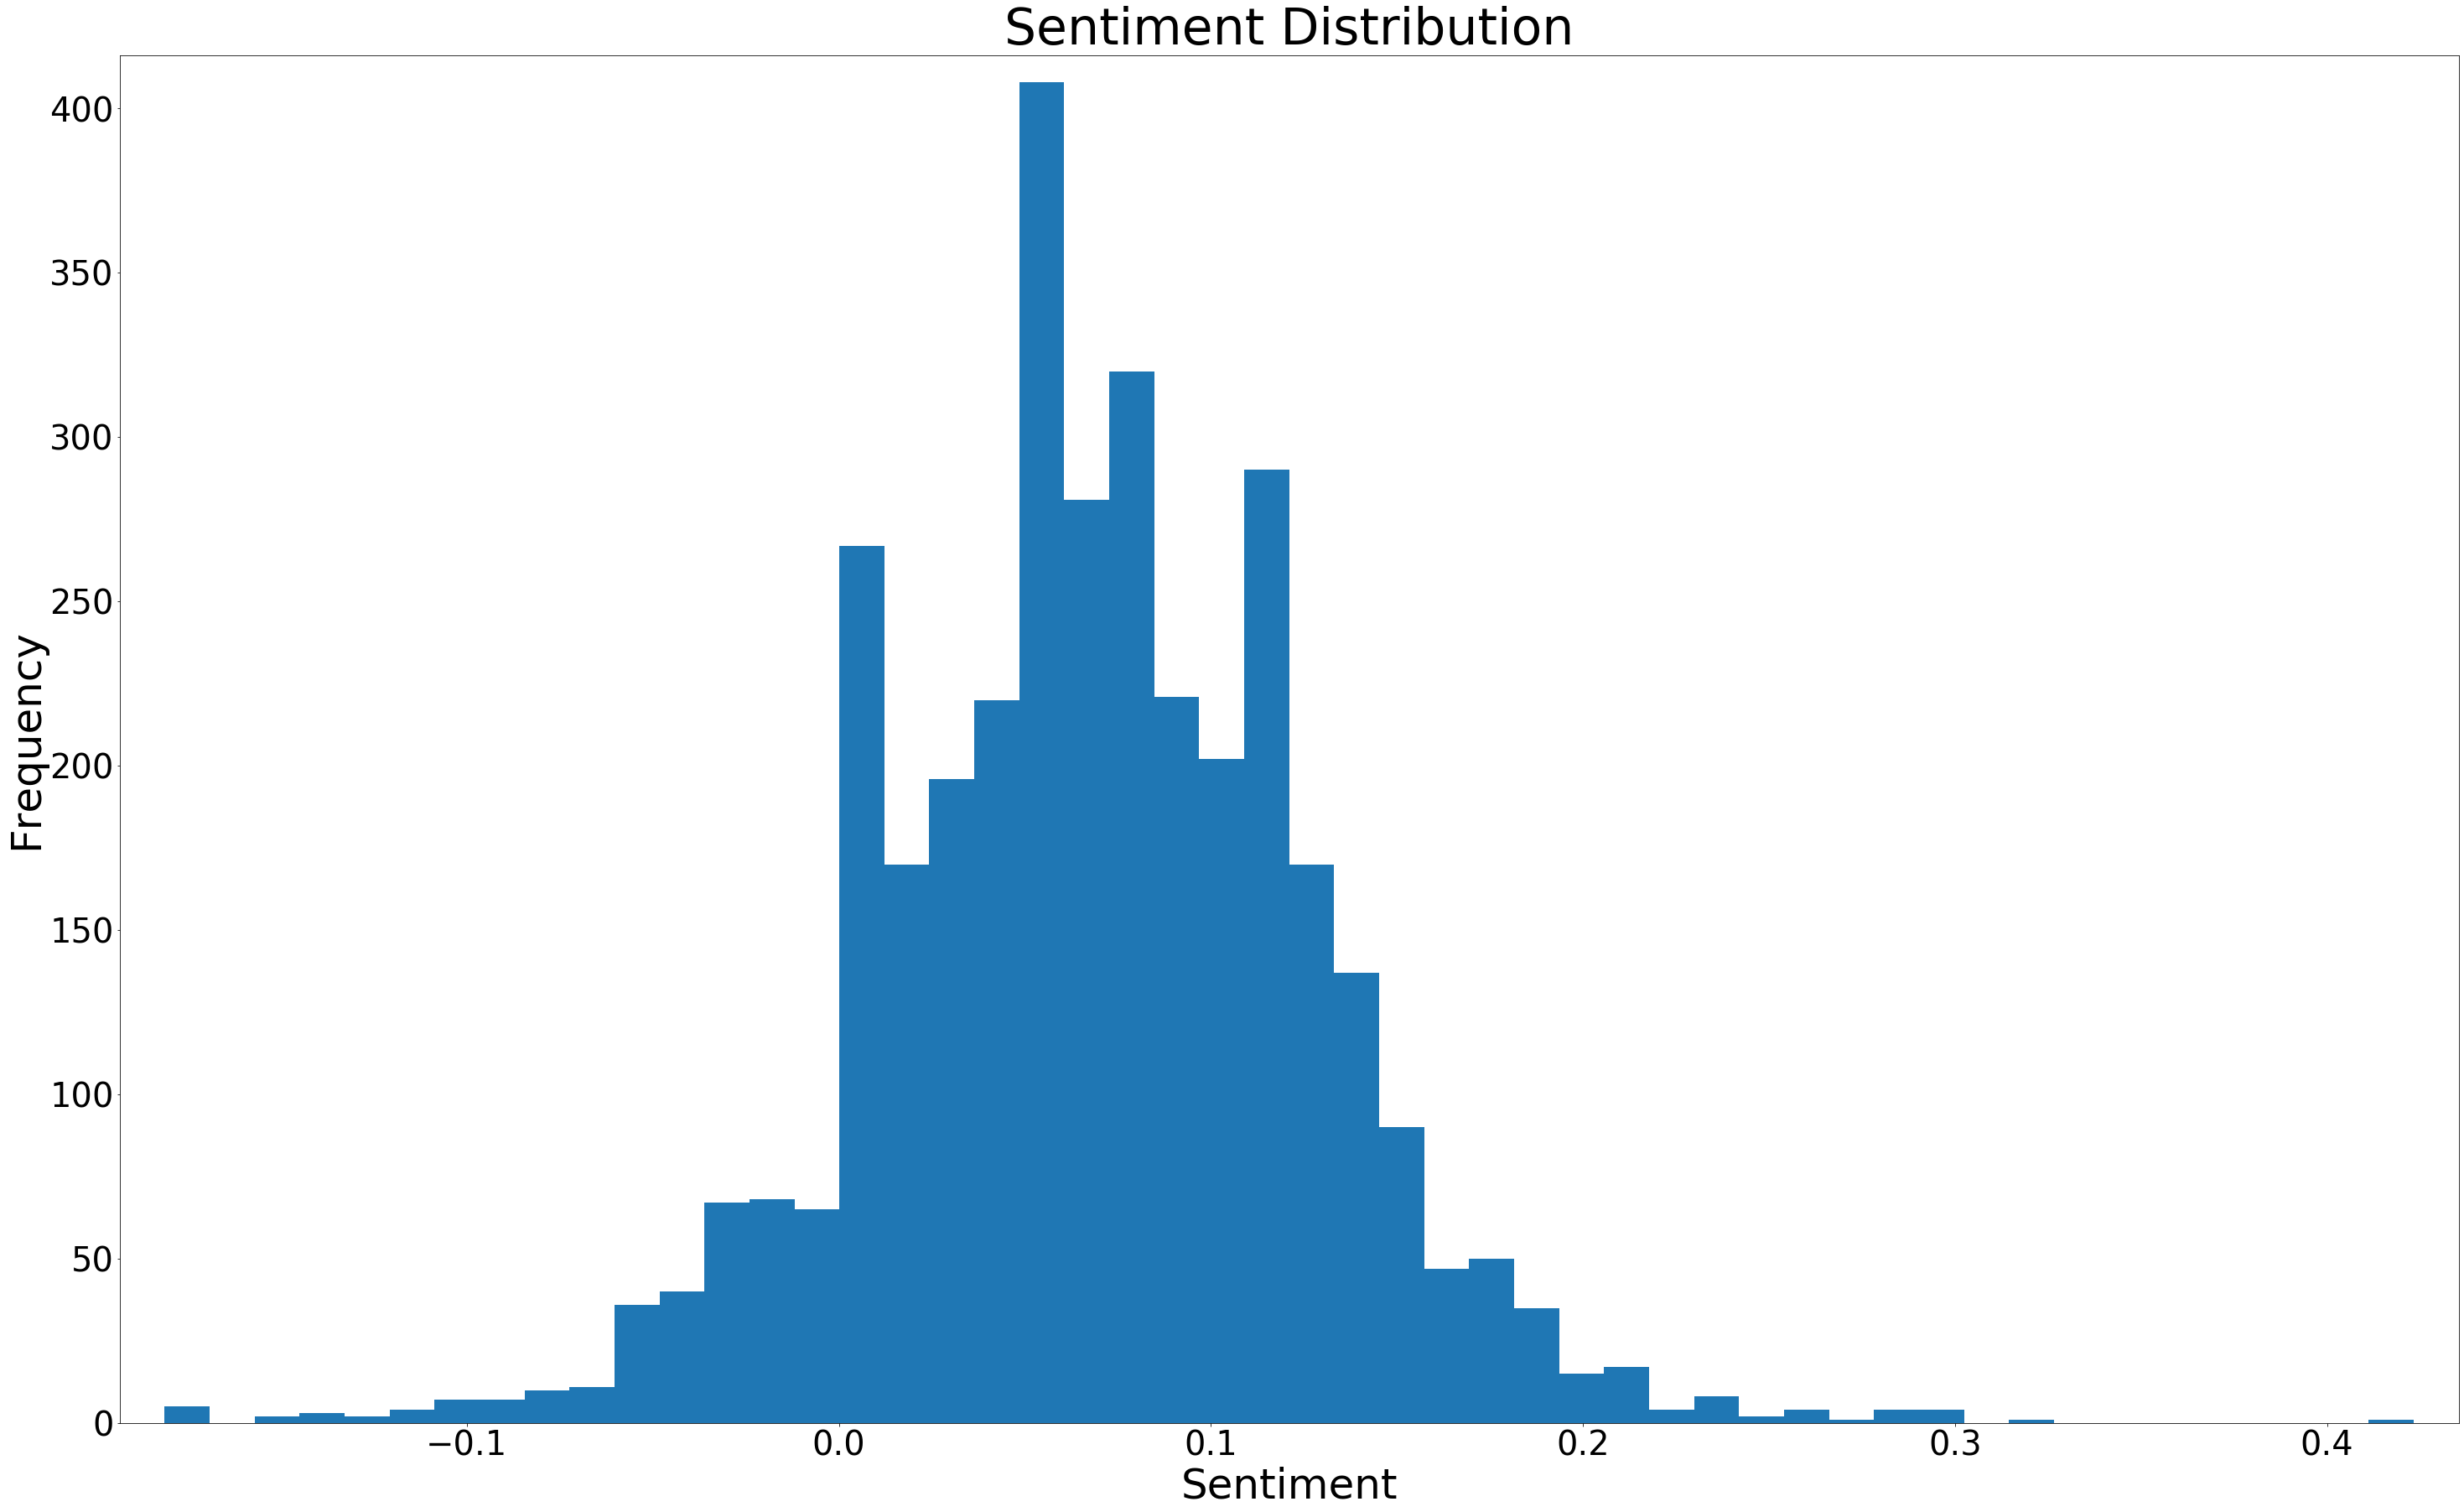

In [45]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

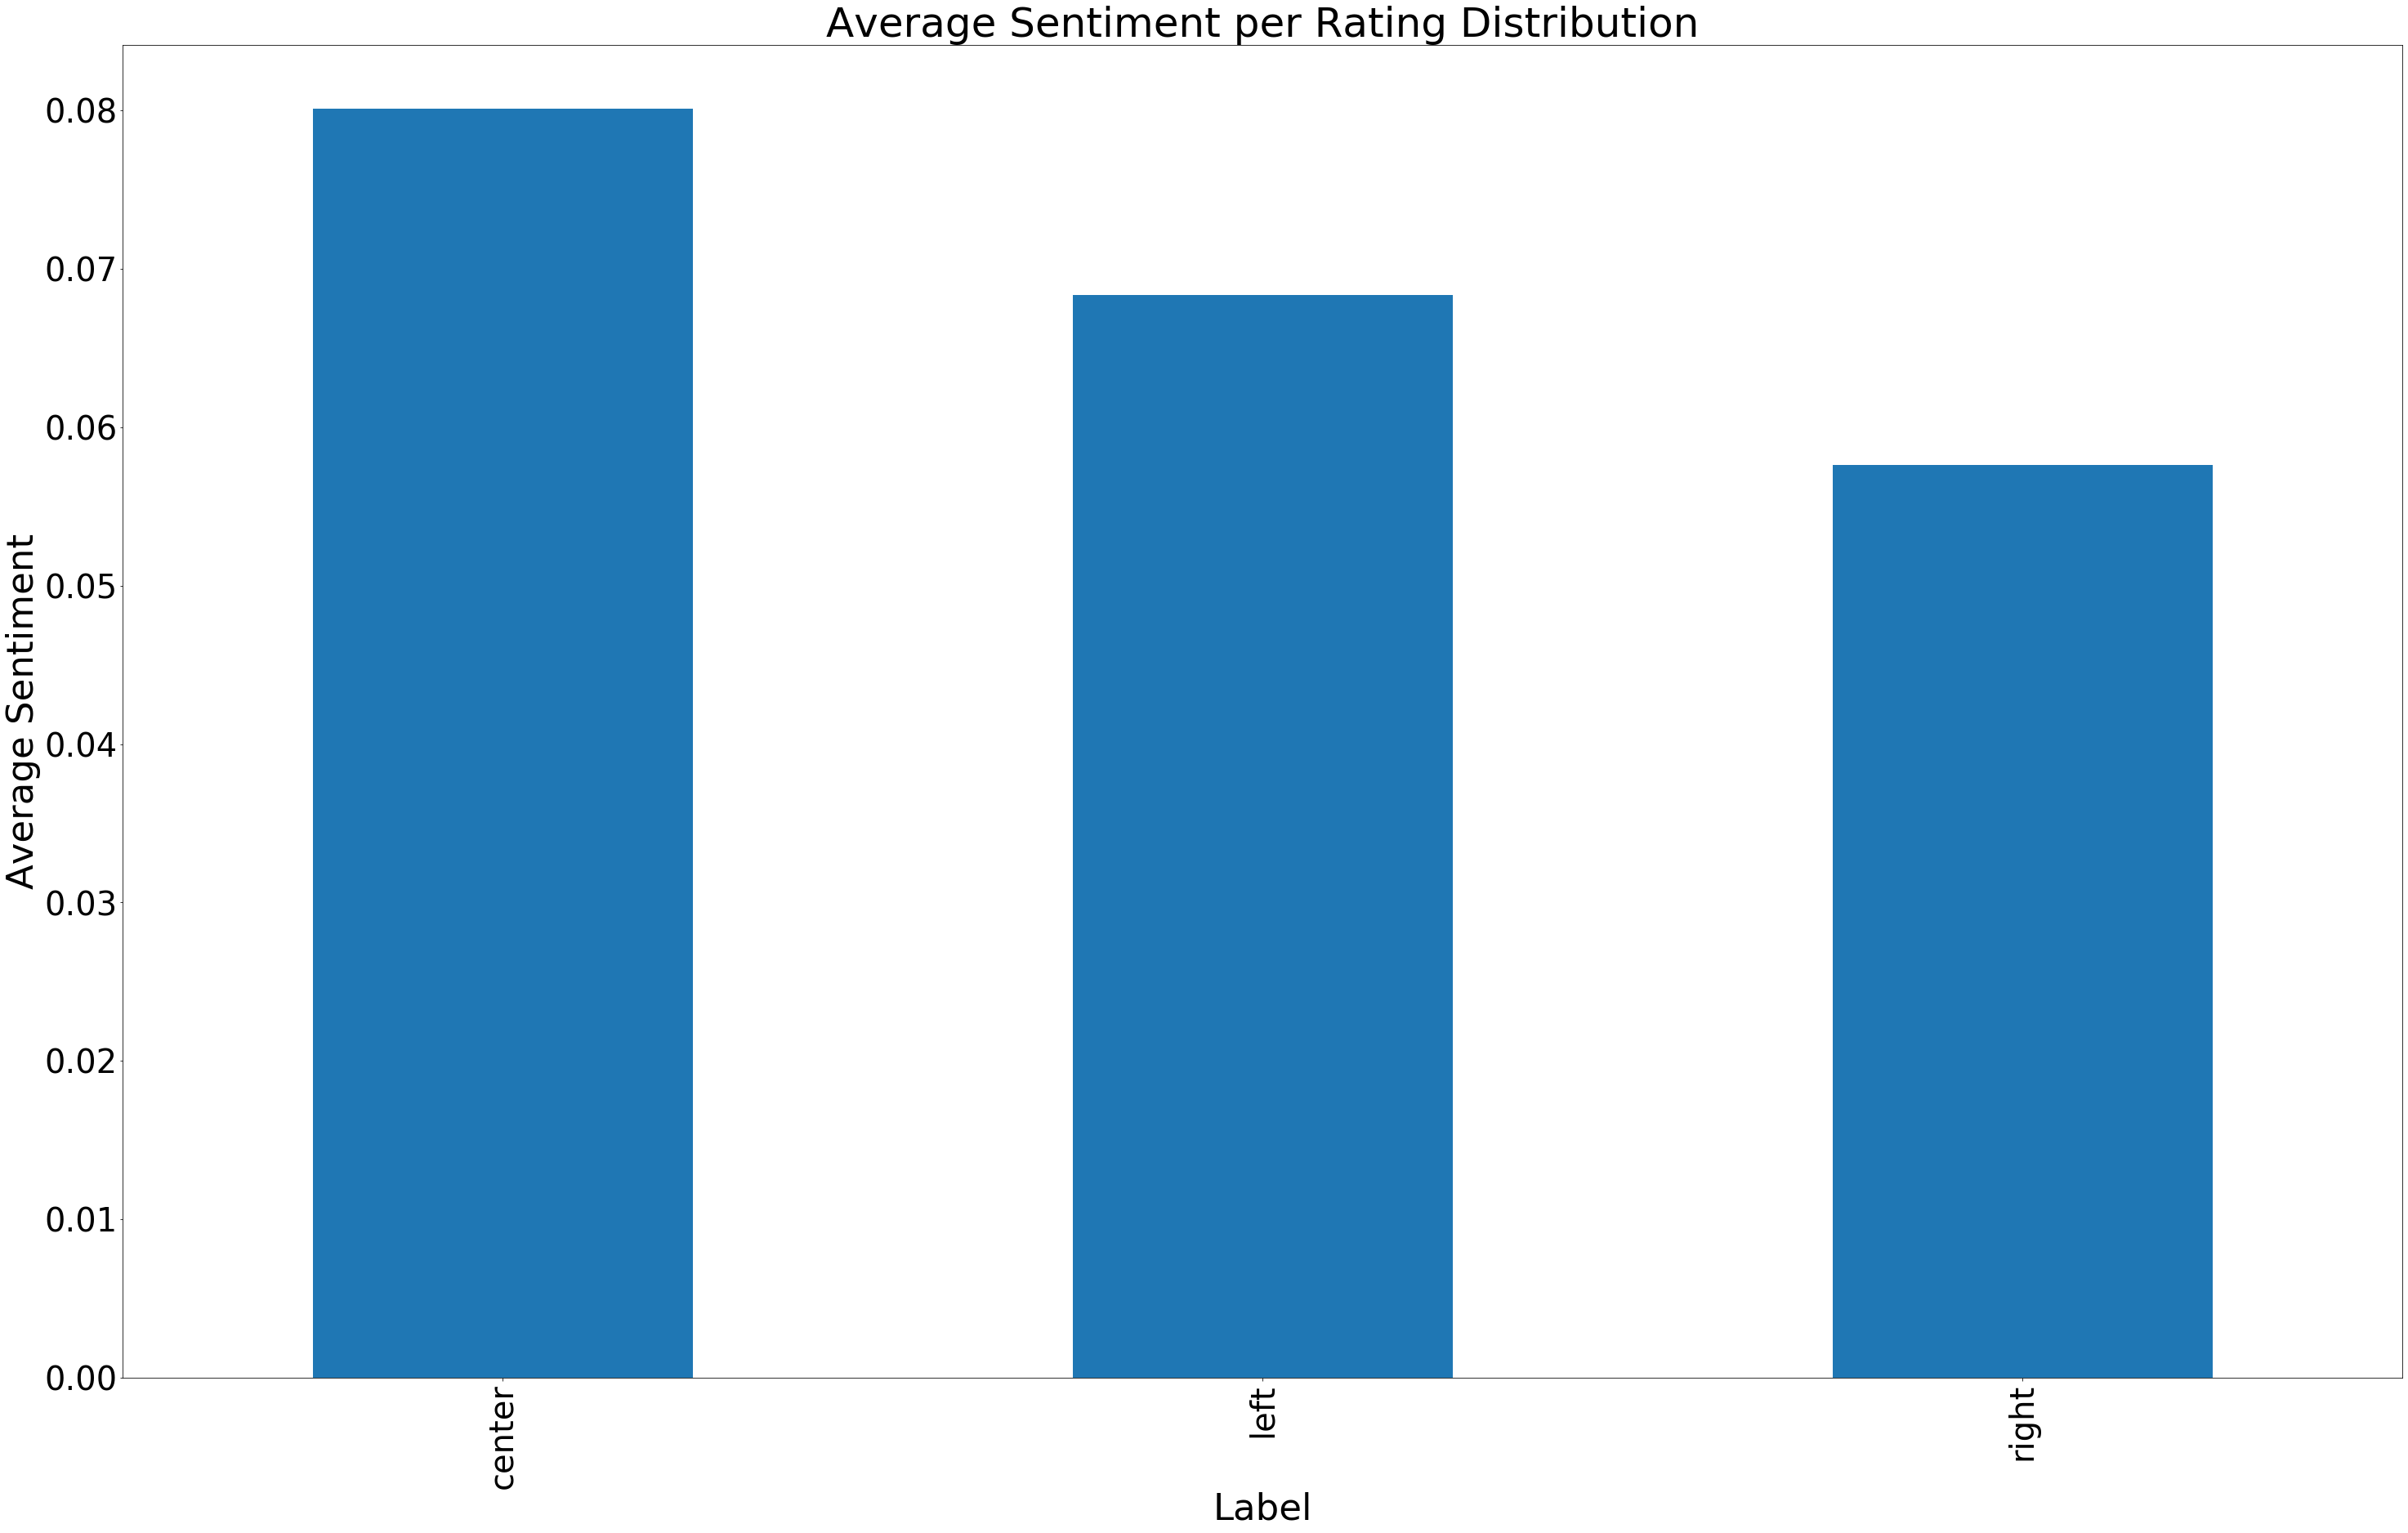

In [46]:
polarity_avg = df.groupby('label')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Label', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [48]:
df['article_len'] = df.article.apply(lambda x:len(x))

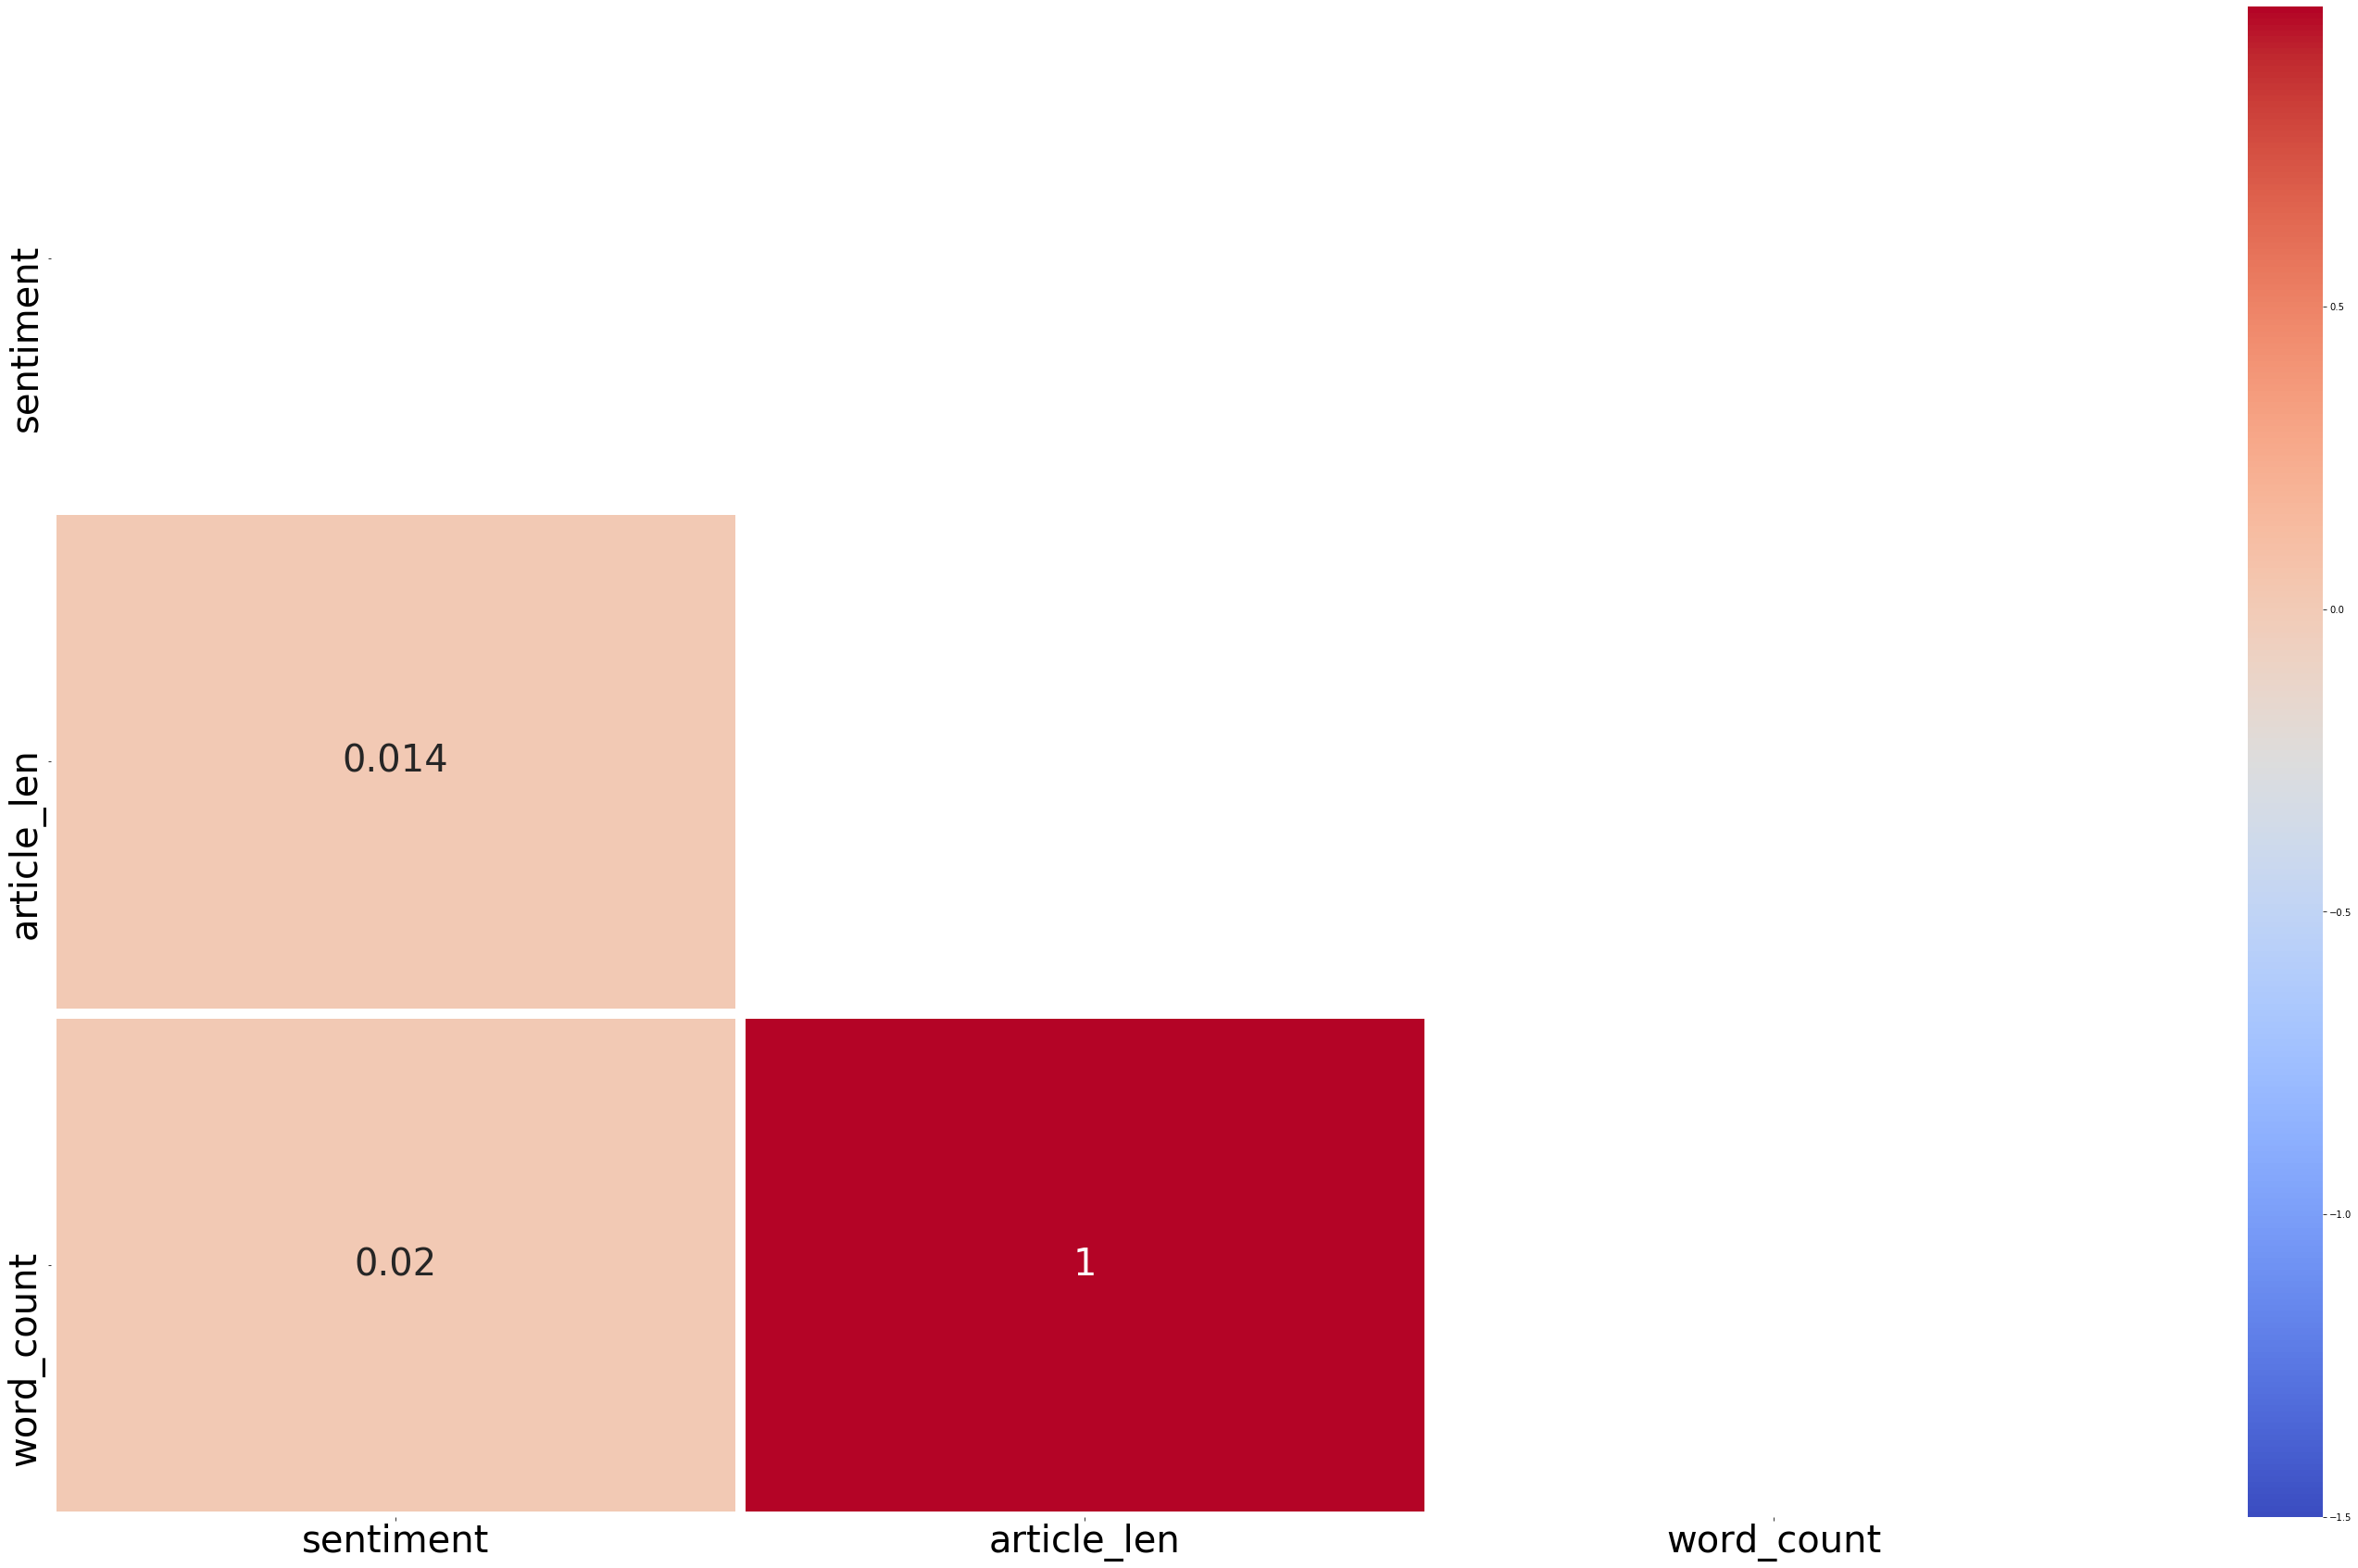

In [50]:
correlation = df[['label','sentiment', 'article_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

# NEW SECTION

In [51]:
df.article.head()

0    the president has yet to clarify what victory ...
1    to hear president joe biden tell it, the ameri...
2    the mainstream media's honeymoon with presiden...
3    the "squad" makes a demand for which there is ...
4    the restraint crowd delivers america's humilia...
Name: article, dtype: object

In [53]:

del(df)

In [179]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.metrics import precision_score
import gensim

In [232]:
df = pd.read_csv('data/test.csv')

In [233]:
def modify(text):
    text = text.replace("SHARE","")
    text = text.lower()
    text = re.sub(r'\d+', '', string=text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = " ".join([i for i in tokens if not i in stop_words])
    text  = word_tokenize(text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text])
    return text

In [234]:
a = modify("been had done languages cities mice")
a

'done language city mouse'

In [235]:
df['cleaned'] = df.article.apply(modify)

In [236]:
df.head()

,article,label,cleaned
0,The president has yet to clarify what victory ...,right,president yet clarify victory pandemic look li...
1,"SHARETo hear President Joe Biden tell it, the ...",right,hear president joe biden tell american evacuat...
2,SHAREThe mainstream media's honeymoon with Pre...,right,mainstream medias honeymoon president joe bide...
3,"The ""Squad"" makes a demand for which there is ...",right,squad make demand military solution better par...
4,The restraint crowd delivers America's humilia...,right,restraint crowd delivers america humiliation a...


# NEW SECTION

In [237]:
X_train, X_test, y_train, y_test = train_test_split(df.cleaned, df.label, test_size = 0.2, random_state = 42)

In [124]:
count_NB_clf = Pipeline([
    ('countVect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [125]:
count_NB_clf.fit(X_train, y_train)

Pipeline(steps=[('countVect', CountVectorizer()), ('clf', MultinomialNB())])

In [126]:
def print_scores(clf, X_test, y_true):
    y_preds = clf.predict(X_test)
    print("*"*50)
    print("confusion matrix:\n", confusion_matrix(y_true, y_preds), "\n")
    print("*"*50)
    print("f1:\n", f1_score(y_true, y_preds, average='weighted'), "\n")
    print("*"*50)
    print("precision:\n", precision_score(y_true, y_preds, average='weighted'), "\n")
    print("*"*50)
    print("recall:\n", recall_score(y_true, y_preds, average='weighted'), "\n")
    

In [129]:
print_scores(count_NB_clf, X_test, y_test)

**************************************************
confusion matrix:
 [[204  31   0]
 [ 11 164   6]
 [  0  21 262]] 

**************************************************
f1:
 0.9037778465921285 

**************************************************
precision:
 0.9113974953025036 

**************************************************
recall:
 0.9012875536480687 



In [148]:
count_LR_clf = Pipeline([
    ('countVect', CountVectorizer()),
    ('clf', SGDClassifier(max_iter=10000))
])

In [149]:
count_LR_clf.fit(X_train, y_train)

Pipeline(steps=[('countVect', CountVectorizer()),
                ('clf', SGDClassifier(max_iter=10000))])

In [150]:
print_scores(count_LR_clf, X_test, y_test)

**************************************************
confusion matrix:
 [[229   5   1]
 [  8 164   9]
 [  1   5 277]] 

**************************************************
f1:
 0.9582797022577082 

**************************************************
precision:
 0.958298310944029 

**************************************************
recall:
 0.9585121602288984 



In [167]:
listModels = [MultinomialNB(), SGDClassifier(), RandomForestClassifier()]
listModels

[MultinomialNB(), SGDClassifier(), RandomForestClassifier()]

In [163]:
count_RF_clf = Pipeline([
    ('countVect', CountVectorizer()),
    ('clf', RandomForestClassifier())
])

In [164]:
count_RF_clf.fit(X_train, y_train)

Pipeline(steps=[('countVect', CountVectorizer()),
                ('clf', RandomForestClassifier())])

In [165]:
print_scores(count_RF_clf, X_test, y_test)

**************************************************
confusion matrix:
 [[231   4   0]
 [  3 177   1]
 [  0  17 266]] 

**************************************************
f1:
 0.9646515095099367 

**************************************************
precision:
 0.9667099924128424 

**************************************************
recall:
 0.9642346208869814 



In [171]:
for clf in listModels:
    print(f"Current Model: {str(clf)}")
    pipeLine = Pipeline([
        ('countVect', CountVectorizer()),
        (str(clf), clf)])
    pipeLine.fit(X_train, y_train)
    print(f"For {str(clf)} we achieve")
    print_scores(pipeLine, X_test, y_test)

Current Model: MultinomialNB()
For MultinomialNB() we achieve
**************************************************
confusion matrix:
 [[204  31   0]
 [ 11 164   6]
 [  0  21 262]] 

**************************************************
f1:
 0.9037778465921285 

**************************************************
precision:
 0.9113974953025036 

**************************************************
recall:
 0.9012875536480687 

Current Model: SGDClassifier()
For SGDClassifier() we achieve
**************************************************
confusion matrix:
 [[230   5   0]
 [  6 171   4]
 [  0   7 276]] 

**************************************************
f1:
 0.9685877103868409 

**************************************************
precision:
 0.9686891475349644 

**************************************************
recall:
 0.9685264663805436 

Current Model: RandomForestClassifier()
For RandomForestClassifier() we achieve
**************************************************
confusion matrix:
 [[228 

In [176]:
for clf in listModels:
    print(f"Current Model: {str(clf)}")
    pipeLine = Pipeline([
        ('countVect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        (str(clf), clf)])
    pipeLine.fit(X_train, y_train)
    print(f"For {str(clf)} we achieve")
    print_scores(pipeLine, X_test, y_test)

Current Model: MultinomialNB()
For MultinomialNB() we achieve
**************************************************
confusion matrix:
 [[227   1   7]
 [ 53  70  58]
 [  0   0 283]] 

**************************************************
f1:
 0.8033883614278571 

**************************************************
precision:
 0.8570949441572395 

**************************************************
recall:
 0.8297567954220315 

Current Model: SGDClassifier()
For SGDClassifier() we achieve
**************************************************
confusion matrix:
 [[231   4   0]
 [  2 177   2]
 [  0   7 276]] 

**************************************************
f1:
 0.978668596506541 

**************************************************
precision:
 0.9790506950831034 

**************************************************
recall:
 0.9785407725321889 

Current Model: RandomForestClassifier()
For RandomForestClassifier() we achieve
**************************************************
confusion matrix:
 [[232  

# NEW SECTION 

In [180]:
def read_corpus(texts, tokens_only = False):
    for i in range(len(texts)):
        tokens = gensim.utils.simple_preprocess(texts.iloc[i])
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [181]:
train_corpus = list(read_corpus(X_train))

In [207]:
#print(train_corpus[:1])

In [208]:
test_corpus = list(read_corpus(X_test, tokens_only=True))
print(len(test_corpus))
#print(test_corpus[:1])

699


In [187]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

In [188]:
model.build_vocab(train_corpus)

In [189]:
print(f"Word 'penalty' appeared {model.wv.get_vecattr('penalty', 'count')} times in the training corpus.")

Word 'penalty' appeared 155 times in the training corpus.


In [190]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [192]:
from tqdm import tqdm
import multiprocessing
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [193]:
cores = multiprocessing.cpu_count()

In [194]:
X_for_tr = [model.infer_vector(x.words) for x in train_corpus]

In [195]:
X_for_test = [model.infer_vector(x) for x in test_corpus]

In [198]:
logreg = LogisticRegression(n_jobs=-1, C=1e5)

In [199]:
logreg.fit(X_for_tr, y_train)

LogisticRegression(C=100000.0, n_jobs=-1)

In [200]:
print_scores(logreg, X_for_test, y_test)

**************************************************
confusion matrix:
 [[193  41   1]
 [ 10 171   0]
 [  3  16 264]] 

**************************************************
f1:
 0.9008766467465998 

**************************************************
precision:
 0.9125207129961651 

**************************************************
recall:
 0.8984263233190272 



# New Section

In [321]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SpatialDropout1D, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.preprocessing import LabelBinarizer

In [286]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

In [287]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)

In [288]:
tokenizer.fit_on_texts(X_train.values)

In [289]:
word_index = tokenizer.word_index

In [290]:
print(f'Found {len(word_index)} unique tokens')

Found 48460 unique tokens


In [291]:
X_train_deep = tokenizer.texts_to_sequences(X_train.values)

In [292]:
X_test_deep = tokenizer.texts_to_sequences(X_test.values)

In [293]:
X_train_deep = pad_sequences(X_train_deep, maxlen=MAX_SEQUENCE_LENGTH)
X_test_deep = pad_sequences(X_test_deep, maxlen=MAX_SEQUENCE_LENGTH)
print(f'SHape of data tensor: {X_train_deep.shape}')

SHape of data tensor: (2793, 250)


In [325]:
lb = LabelBinarizer()
y_train_deep = lb.fit_transform(y_train.values)
y_train_deep[1]

array([0, 0, 1])

In [327]:
y_test_deep = lb.transform(y_test.values)
y_test_deep[1]

array([0, 0, 1])

In [328]:
X_train_deep[0]

array([ 3884,   106,  1678, 10523,  4168,  2120,    23,    82,  4322,
         342,   394,  1678,    51,     9,    65,   101,    72,   109,
        7505,  2555,  3482, 10142,  9047,   109,  4270,  1158,    46,
          36,   919,   150,  7273,  2182,  1474,   223,   522,  1099,
          21,  7735,    44, 10524,  7736,   552,  1410,   546,  4271,
         166,   942,  1885,   183,     6,    89,   562,    20,    15,
        2499,  5222, 10525,   168,  1021,  1831,   109,  1524,    93,
         291, 10526,  6886,   178,   552,  6129,  7737,   227,    10,
        2080, 10527,   775,   219,  4169,   517,   109, 10143,    49,
          96,  1063,  1448,    43,     4,   294,   806,   198, 10528,
         249,  6397,  2519,  2519,  1142,    10, 10529,   159,    86,
       10530, 10531,    96,  1448,  1558,    24,  1341,   527,  1030,
        1668,    42,  1345, 10532,   753,  2911,    18,   377,   105,
        1142,    86,  3271,    89,  7506,  1541,     6,  2291, 10533,
         143,    42,

In [329]:
#y_train_deep = y_train.apply(createY)

In [330]:
y_train_deep

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [331]:
def buildModel():
    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train_deep.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
    #model.add(Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [332]:
X_train_deep.shape, y_train.shape

((2793, 250), (2793,))

In [333]:
epochs = 3
batch_size = 32
model = buildModel()
history = model.fit(X_train_deep, y_train_deep, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/3
70/70 [==============================] - 40s 558ms/step - loss: 0.6681 - accuracy: 0.6902 - val_loss: 0.5036 - val_accuracy: 0.7585
Epoch 2/3
70/70 [==============================] - 38s 549ms/step - loss: 0.2124 - accuracy: 0.9463 - val_loss: 0.0805 - val_accuracy: 0.9767
Epoch 3/3
70/70 [==============================] - 39s 559ms/step - loss: 0.0264 - accuracy: 0.9937 - val_loss: 0.0840 - val_accuracy: 0.9732


In [334]:
accr = model.evaluate(X_test_deep, y_test_deep)
print(f'Test set \n Loss {accr[0]:0.3f} Accuracy {accr[1]:0.3f}')

22/22 [==============================] - 1s 55ms/step - loss: 0.0863 - accuracy: 0.9700
Test set 
 Loss 0.086 Accuracy 0.970


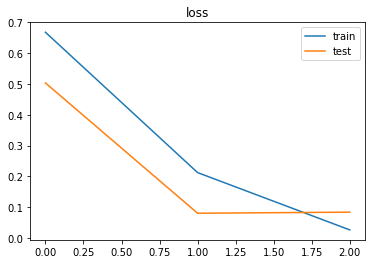

In [335]:
plt.title('loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

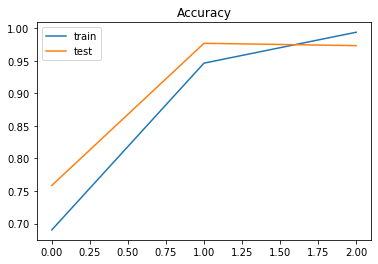

In [336]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [337]:
y_preds = model.predict(X_test_deep)

In [338]:
y_preds = model.predict_classes(X_test_deep)

/usr/lib/python3/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [392]:
y_preds = np.argmax(model.predict(X_test_deep), axis=1)

In [394]:
y_preds = [lb.classes_[i] for i in y_preds]

In [406]:
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds,average=None))
print(recall_score(y_test, y_preds,average=None))

[[232   1   2]
 [  4 171   6]
 [  2   6 275]]
0.9699570815450643
[0.97478992 0.96067416 0.97173145]
[0.98723404 0.94475138 0.97173145]
